# Exploration of PISA 2012 for German students
## by Markus Stachl

## Preliminary Wrangling

> PISA is the OECD's Programme for International Student Assessment. PISA measures 15-year-olds’ ability to use their reading, mathematics and science knowledge and skills to meet real-life challenges.
> The given dataset from the PISA database contains the full set of responses from individual students. The dataset is provided in an Excel-file. Other formats can be found on their website, https://www.oecd.org/pisa/data/.
> The dataset contains extensive responses from participating students around the world. An explanation of all features gathered by the PISA 2012 study can be found on https://www.oecd.org/pisa/pisaproducts/PISA12_stu_codebook.pdf.
> I will restrict the dataset to reponses from German students.


In [221]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import io


%matplotlib inline

sb.set_palette("Paired")
color = sb.color_palette()[0]

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [6]:
file = io.open('../pisa2012data/pisa2012.csv', encoding='latin-1')
df = pd.read_csv(file, index_col = 0)

C:\Users\Lenovo\Anaconda3\envs\py3.6\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [8]:
df.shape

(485490, 635)

In [9]:
df_ger = df[df['CNT']=="Germany"]
df_ger.sample(10)

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
133994,Germany,2760000,DEU0109,OECD,Germany,40,893,8,3.0,2,...,90.7535,273.0898,279.0614,90.3940,87.2801,272.4067,44,1,0.2460,22NOV13
133240,Germany,2760000,DEU0106,OECD,Germany,6,139,10,9.0,3,...,254.2842,254.2842,254.2842,254.4373,254.4373,254.2842,10,2,0.2177,22NOV13
135297,Germany,2760000,DEU0101,OECD,Germany,100,2196,10,3.0,2,...,255.7152,235.0491,244.9256,246.6790,93.7452,95.8291,51,1,0.2336,22NOV13
136669,Germany,2760000,DEU0211,OECD,Germany,166,3568,10,4.0,7,...,75.0817,75.0817,75.0817,75.0817,225.2451,75.0817,50,1,0.1984,22NOV13
136771,Germany,2760000,DEU0101,OECD,Germany,170,3670,9,3.0,11,...,61.6511,176.4574,61.2907,185.1883,58.7198,176.5925,67,1,0.1590,22NOV13
133847,Germany,2760000,DEU0107,OECD,Germany,34,746,10,4.0,2,...,226.4160,78.9955,225.4060,78.9955,220.5255,222.1030,6,2,0.2024,22NOV13
133412,Germany,2760000,DEU0108,OECD,Germany,15,311,10,4.0,5,...,231.4330,43.9569,231.4330,231.4330,231.4330,231.4330,54,1,0.1873,22NOV13
136291,Germany,2760000,DEU0211,OECD,Germany,147,3190,10,10.0,6,...,82.8955,229.5921,69.8860,233.5075,69.8860,233.5075,67,1,0.1969,22NOV13
137290,Germany,2760000,DEU0215,OECD,Germany,194,4189,9,4.0,5,...,87.7921,263.3764,232.9660,87.7921,263.3764,232.9660,73,2,0.2176,22NOV13
135342,Germany,2760000,DEU0105,OECD,Germany,102,2241,11,4.0,8,...,100.5796,301.7388,301.7388,301.7388,301.7388,100.5796,78,1,0.2658,22NOV13


In [10]:
df_ger.shape

(5001, 635)

### What is the structure of your dataset?

> The given dataset consists of 485490 worldwide student responses to the PISA survey. Each response contains 635 features. German students make up 5001 responses.

### What is/are the main feature(s) of interest in your dataset?

> Main features contain the student performances PV1MATH, PV1READ, PV1SCIE

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **Test scores:**
> - Mathematics score: PV1MATH
> - Reading score: PV1READ
> - Science score: PV1SCIE

> **Student information:**
> - Country: CNT
> - Gender of student: ST04Q01
> - National study program (type of attended school): ST02Q01

> **Family information:**
> - Education level father: FISCED
> - Education level mother: MISCED
> - Highest education level parents: HISCED
> - Family structure: FAMSTRUC
> - Immigration status: IMMIG

The dataset contains extensive information from each student. I restict the dataset to features I consider interesting and which I want to further investigate in the following report.

In [11]:
df_ger = df_ger[["CNT", "ST04Q01", "ST02Q01", "PV1MATH", "PV1READ", 
                 "PV1SCIE", "FISCED", "MISCED", "HISCED", "FAMSTRUC", "IMMIG"]]

Column names are rather technical and therefore complicate the analysis, as the feature meaning is not visible right ahead. I therefore rename the columns based on their implication.

In [12]:
df_ger = df_ger.rename(columns={"CNT": "country", 
                                "ST02Q01": "school_type", 
                                "ST04Q01": "gender", 
                                "PV1MATH": "math_score", 
                                "PV1READ": "reading_score", 
                                "PV1SCIE": "science_score", 
                                "FISCED": "education_father", 
                                "MISCED": "education_mother", 
                                "HISCED": "education_parents", 
                                "FAMSTRUC": "family_structure", 
                                "IMMIG": "immigration_status"})

In [13]:
df_ger.sample(5)

,country,gender,school_type,math_score,reading_score,science_score,education_father,education_mother,education_parents,family_structure,immigration_status
136085,Germany,Female,4.0,498.0604,592.4799,561.3018,"ISCED 5A, 6","ISCED 5A, 6","ISCED 5A, 6",2.0,Native
133124,Germany,Female,9.0,413.8573,411.8537,420.3096,ISCED 2,"ISCED 3A, ISCED 4","ISCED 3A, ISCED 4",2.0,First-Generation
138039,Germany,Female,4.0,528.5948,591.8444,545.3562,NaN,"ISCED 3A, ISCED 4","ISCED 3A, ISCED 4",NaN,Native
134853,Germany,Female,1.0,276.2969,263.8738,221.6897,ISCED 2,None,ISCED 2,2.0,Second-Generation
133945,Germany,Female,5.0,423.0488,495.2563,536.8706,ISCED 5B,NaN,ISCED 5B,NaN,Native


In [14]:
df_ger.dtypes

country                object
gender                 object
school_type           float64
math_score            float64
reading_score         float64
science_score         float64
education_father       object
education_mother       object
education_parents      object
family_structure      float64
immigration_status     object
dtype: object

### Further data wrangling

#### Remove null values

I will remove all null values from the dataset to ease further analysis.

In [15]:
"""Drop null values"""
df_ger = df_ger.dropna()

In [16]:
df_ger.shape

(3197, 11)

#### Add speaking school types

At the moement, school types are labelled using float numbers. I will replace them with string representations and a meaningful, short description of the school type.

In [17]:
df_ger.school_type.unique()

array([10.,  9.,  4.,  3.,  1., 12.,  2.,  5., 15., 16., 14., 11.])

In [18]:
df_ger.loc[:,"school_type"] = df_ger["school_type"].astype('str')

school_map = {"1.0": "Special school", 
              "2.0": "Main school",
              "3.0": "Middle school",
              "4.0": "High school",
              "5.0": "Integrated school",
              "9.0": "Integrated school",
              "10.0": "Middle school",
              "11.0": "Main school",
              "12.0": "Middle school",
              "14.0": "Vocational preparation",
              "15.0": "Vocational school",
              "16.0": "Vocational college"
             }
df_ger["school_type"] = df_ger["school_type"].replace(school_map)

In [19]:
df_ger["school_type"].unique()

array(['Middle school', 'Integrated school', 'High school',
       'Special school', 'Main school', 'Vocational school',
       'Vocational college', 'Vocational preparation'], dtype=object)

#### Add speaking family structure values

In [20]:
family_structure_map = {1.0: "Single father/mother",
                       2.0: "Both parents",
                       3.0: "Other"}

df_ger["family_structure"] = df_ger["family_structure"].replace(family_structure_map)

In [21]:
df_ger.family_structure.unique()

array(['Single father/mother', 'Both parents', 'Other'], dtype=object)

#### Set category datatypes

Several features can be represented as categories while currently being formatted as strings. I will change this accordingly.

In [22]:
family_categories = pd.api.types.CategoricalDtype(categories=["Both parents", "Single father/mother", "Other"], 
                                                                 ordered=True)
df_ger["family_structure"] = df_ger["family_structure"].astype(family_categories)

gender_categories = pd.api.types.CategoricalDtype(categories=["Female", "Male"], ordered=False)
df_ger["gender"] = df_ger["gender"].astype(gender_categories)

school_categories = pd.api.types.CategoricalDtype(categories=["Special school", "Main school", "Middle school", 
                                                                        "Integrated school", "High school", 
                                                                        "Vocational preparation", 
                                                                        "Vocational school", "Vocational college"],
                                                            ordered=False)
df_ger["school_type"] = df_ger["school_type"].astype(school_categories)

immigration_categories = pd.api.types.CategoricalDtype(categories=["Native", "Second-Generation", "First-Generation"], 
                                                                 ordered=True)
df_ger["immigration_status"] = df_ger["immigration_status"].astype(immigration_categories)

education_categories = pd.api.types.CategoricalDtype(categories=['ISCED 5B', 'ISCED 5A, 6', 'ISCED 3B, C',
       'ISCED 3A, ISCED 4', 'ISCED 2', 'ISCED 1', 'None'], ordered=True)
df_ger["education_father"] = df_ger["education_father"].astype(education_categories)
df_ger["education_mother"] = df_ger["education_mother"].astype(education_categories)
df_ger["education_parents"] = df_ger["education_parents"].astype(education_categories)


In [23]:
df_ger.dtypes

country                 object
gender                category
school_type           category
math_score             float64
reading_score          float64
science_score          float64
education_father      category
education_mother      category
education_parents     category
family_structure      category
immigration_status    category
dtype: object

In [113]:
df_ger.to_csv('pisa_2012_DEU_clean.csv', index_label=False)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Gender distribution

In [24]:
by_gender = df_ger.gender.value_counts()
by_gender

Female    1616
Male      1581
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x17248dc3358>,
 [Text(-1.1098358774890296, -0.019087300441812127, 'Female'),
  Text(1.1098358792761067, 0.019087196531477387, 'Male')],
 [Text(-0.6099098065480252, -0.010489417359914772, '50.5%'),
  Text(0.6099098075301126, 0.010489360256037122, '49.5%')])

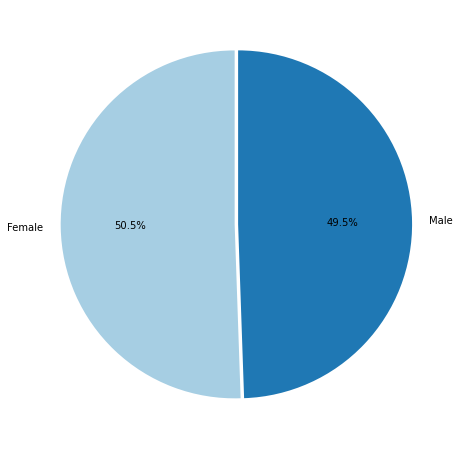

In [268]:
plt.figure(figsize=(8,8))
explode = (0.01, 0.01)
plt.pie(by_gender.values, explode = explode, labels = by_gender.index, autopct='%1.1f%%', startangle=90)

> The dataset contains approximately equal number of male and female students.

### Test scores of students

In [223]:
math_oecd_mean = df.query("OECD == 'OECD'")["PV1MATH"].mean()
reading_oecd_mean = df.query("OECD == 'OECD'")["PV1READ"].mean()
science_oecd_mean = df.query("OECD == 'OECD'")["PV1SCIE"].mean()
print('Mean for math test in OECD countries: {}'.format(math_oecd_mean))
print('Mean for reading test in OECD countries: {}'.format(reading_oecd_mean))
print('Mean for science test in OECD countries: {}'.format(science_oecd_mean))

Mean for math test in OECD countries: 488.3477719121511
Mean for reading test in OECD countries: 490.7844131820888
Mean for science test in OECD countries: 494.87909850752834


In [224]:
df_ger[["math_score", "science_score", "reading_score"]].describe()

,math_score,science_score,reading_score
count,3197.000000,3197.000000,3197.000000
mean,534.168330,544.606399,528.700826
std,92.915377,89.706077,84.881648
min,224.887100,202.107400,246.178900
25%,472.121800,485.863500,473.809900
50%,539.499900,552.722900,536.560400
75%,600.412800,607.926100,590.573500
max,797.016700,782.114900,753.883700


Text(0.5, 0.98, 'Score distribution per subject')

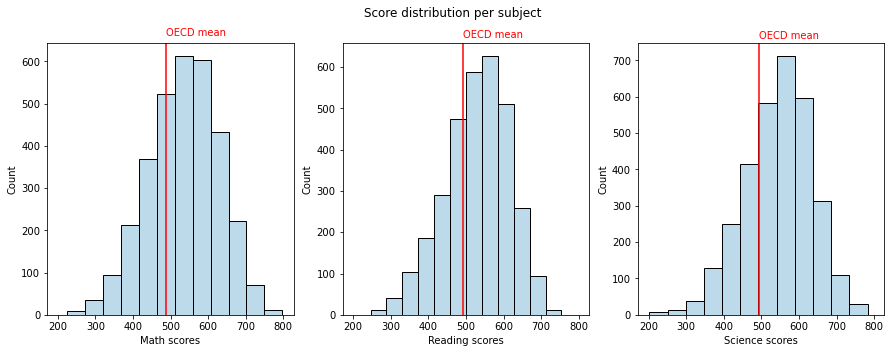

In [225]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

sb.histplot(df_ger['math_score'], ax=axes[0], bins=12)
sb.histplot(df_ger['reading_score'], ax=axes[1], bins=12)
sb.histplot(df_ger['science_score'], ax=axes[2], bins=12)
axes[0].axvline(x=math_oecd_mean, color="red")
axes[0].text(math_oecd_mean,660,'OECD mean', color="red")
axes[1].axvline(x=reading_oecd_mean, color="red")
axes[1].text(reading_oecd_mean,670,'OECD mean', color="red")
axes[2].axvline(x=science_oecd_mean, color="red")
axes[2].text(science_oecd_mean,760,'OECD mean', color="red")

"""Set xlabels to destinguish plot target (math, reading, science)"""
axes[0].set_xlabel("Math scores")
axes[1].set_xlabel("Reading scores")
axes[2].set_xlabel("Science scores")
plt.suptitle('Score distribution per subject')

All scores - `math_score`, `reading_score` and `science_score` -  are approximately normal distributed and centered arount 500. Most students score between 300 and 750 on each test. On average, students tend to perform slightly better (arount 20 points) on the `science_score` compared to reading and mathmatics.

The red line represents the test scores averaged over all OECD countries. Seeing this, Germany performs above average in all three test subjects.

### School types

In [226]:
school_counts = df_ger.school_type.value_counts()
school_counts

High school               1404
Middle school             1067
Integrated school          342
Main school                271
Special school              54
Vocational college          26
Vocational school           20
Vocational preparation      13
Name: school_type, dtype: int64

Text(0.5, 1.0, 'Distribution of student school types in Germany for PISA 2021 survey')

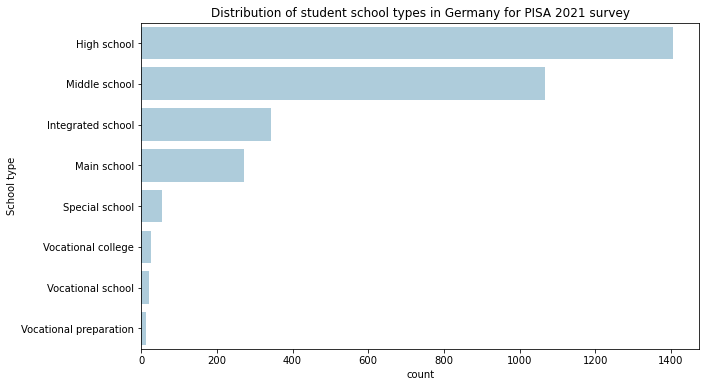

In [227]:
order = df_ger['school_type'].value_counts().index
plt.figure(figsize=(10,6))
sb.countplot(data=df_ger,y='school_type',order=order, color=color)
plt.ylabel("School type")
plt.title("Distribution of student school types in Germany for PISA 2021 survey")

### Family structure

In [228]:
famstruc_counts = df_ger.family_structure.value_counts()
famstruc_counts

Both parents            2814
Single father/mother     371
Other                     12
Name: family_structure, dtype: int64

In [229]:
def write_percentages(locs, labels, n_points, counts):
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count+20, pct_string, ha = 'center', va='bottom', color = 'black')

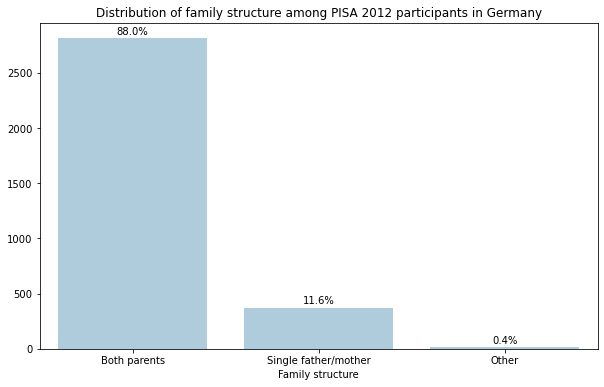

In [230]:
plt.figure(figsize=(10,6))
sb.barplot(x=famstruc_counts.index, y=famstruc_counts.values, color=color)
plt.xlabel("Family structure")
plt.title("Distribution of family structure among PISA 2012 participants in Germany")

# add annotations
n_points = df_ger.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels

write_percentages(locs, labels, n_points, famstruc_counts)

### Immigration

In [231]:
immi_counts = df_ger.immigration_status.value_counts()

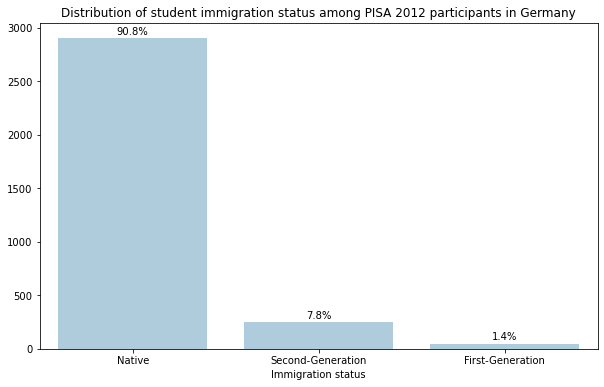

In [262]:
plt.figure(figsize=(10,6))
sb.barplot(x=immi_counts.index, y=immi_counts.values, color=color)
plt.xlabel("Immigration status")
plt.title("Distribution of student immigration status among PISA 2012 participants in Germany")

# add annotations
n_points = df_ger.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels

write_percentages(locs, labels, n_points, immi_counts)

([<matplotlib.patches.Wedge at 0x17248e01b70>,
 [Text(-0.3172871502637739, -1.0636864501710517, 'Native'),
  Text(0.3650282705941667, 1.048262544245015, 'Second-Generation'),
  Text(0.050158025202555176, 1.1088661652822582, 'First-Generation')],
 [Text(-0.1743650105053172, -0.5845484095534608, '90.8%'),
  Text(0.20060112167787536, 0.5760722089995127, '7.8%'),
  Text(0.027564320156359148, 0.6093769016416012, '1.4%')])

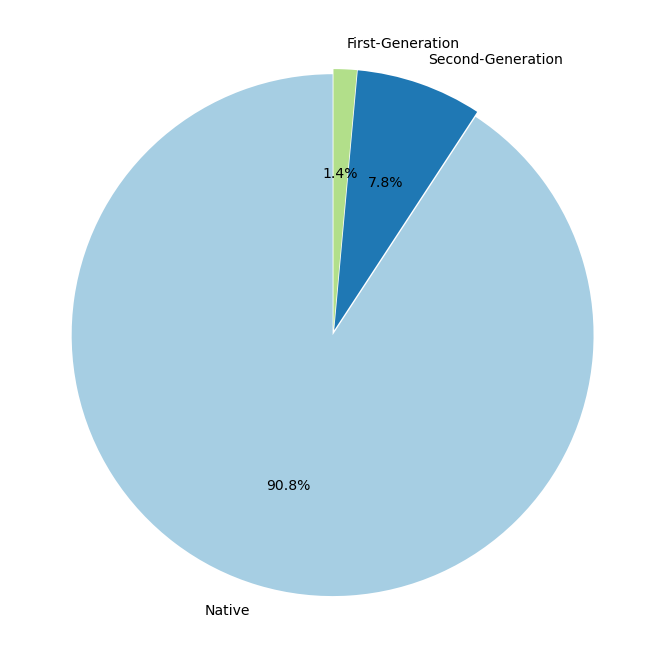

In [269]:
plt.figure(figsize=(12,12))
explode = (0.01, 0.01, 0.01)
plt.pie(immi_counts.values, explode = explode, labels = immi_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

### Scholar education of parents

Text(0.5, 0.98, 'Distribution of highest educational achievement of mother, father and combined')

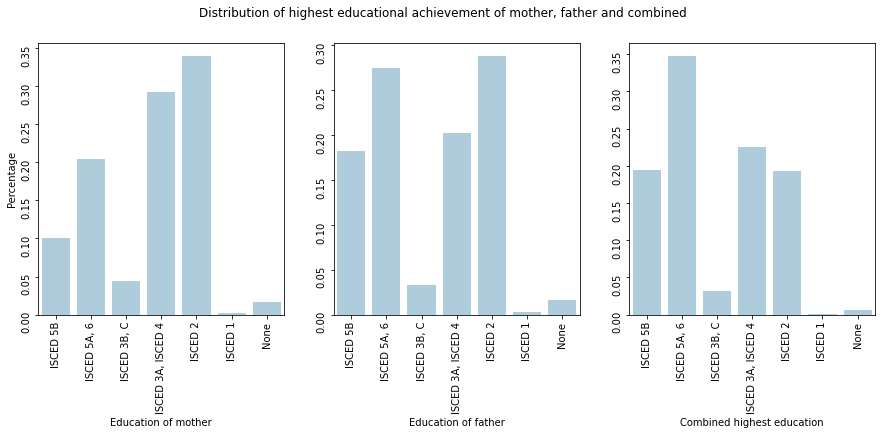

In [233]:
"""Create figures"""
fix, axes = plt.subplots(1,3, figsize=(15,5))

"""Compute percentages for distribution of scholar education"""
education_mother_count=df_ger.education_mother.value_counts(normalize=True)
education_father_count=df_ger.education_father.value_counts(normalize=True)
education_parents_count=df_ger.education_parents.value_counts(normalize=True)

"""Plot 3 barchats for mother, father and combined education"""
sb.barplot(x=education_mother_count.index, y=education_mother_count.values, ax=axes[0], color=color)
sb.barplot(x=education_father_count.index, y=education_father_count.values, ax=axes[1], color=color)
sb.barplot(x=education_parents_count.index, y=education_parents_count.values, ax=axes[2], color=color)

"""Rotate xticks to make them readable"""
axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)

"""Set xlabels to destinguish plot target (mother, father, combined)"""
axes[0].set_xlabel("Education of mother")
axes[1].set_xlabel("Education of father")
axes[2].set_xlabel("Combined highest education")
axes[0].set_ylabel("Percentage")

"""Set plot title"""
plt.suptitle('Distribution of highest educational achievement of mother, father and combined')

Most of all parents have at least education level `ISCED 2`, meaning secondary education or middle school. Among all parents, more than 50% of adults have some secondary education (`ISCED 2, 3, 4`). Comparing the number of fathers and mothers with higher education shows that among all studens, the percentage of students whos father holds a  graduate degree (`ISCED 5B`) is about doubled compared to students whos mother has such an education. This gives rise to the assumption that in 2012, the classic role model was still widely spread.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - **Test scores:** Test scores were normal distributed among all subjects. I am curious to see, if there is a difference between male and female students or between immigrants and natives. 
> - **Immigration status**: Interestingly only 10% of students are either first or second-generation immigrations. I expected the number to be higher as Germany is an immigration country.
> - **Family structure:** Around 88% of students are raised in a traditional environment with mother and father as caretaker. Nevertheless, 11% of students live with a single parent. Considering this being around 2-3 in every school class, on average this seems plausible.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - **School type:** As schools were categorized using float values, I needed to transform them into categorical strings. Therefore I mapped float values to a describing string translating school names from the PISA 2012 scale handbook (https://www.pisa.tum.de/fileadmin/w00bgi/www/Berichtsbaende_und_Zusammenfassungungen/PISA_2012_Skalenhandbuch_final-openaccess.pdf)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Do female and male students perform differently on the tests?

In [234]:
df_ger[["gender", "math_score", "reading_score", "science_score"]].groupby("gender").describe()

math_score                                                         \
            count        mean        std       min         25%       50%   
gender                                                                     
Female     1616.0  525.690603  90.384587  235.4806  463.728775  529.4516   
Male       1581.0  542.833736  94.679750  224.8871  481.235400  548.6135   

                            reading_score              ...            \
              75%       max         count        mean  ...       75%   
gender                                                 ...             
Female  592.35085  775.7517        1616.0  548.776289  ...  606.2214   
Male    610.14960  797.0167        1581.0  508.180934  ...  570.9666   

                 science_score                                               \
             max         count        mean        std       min         25%   
gender                                                                        
Female  753.8837        1616.0  543.195446  87.621714  202.1074  484.791075   
Male    725.6619        1581.0  546.048587  91.793023  233.8120  488.288000   

                                      
             50%       75%       max  
gender                                
Female  551.7904  604.7557  775.5875  
Male    553.8419  612.4021  782.1149  

[2 rows x 24 columns]

Text(0.5, 0.98, 'Distribution of test score comparing female vs. male students')

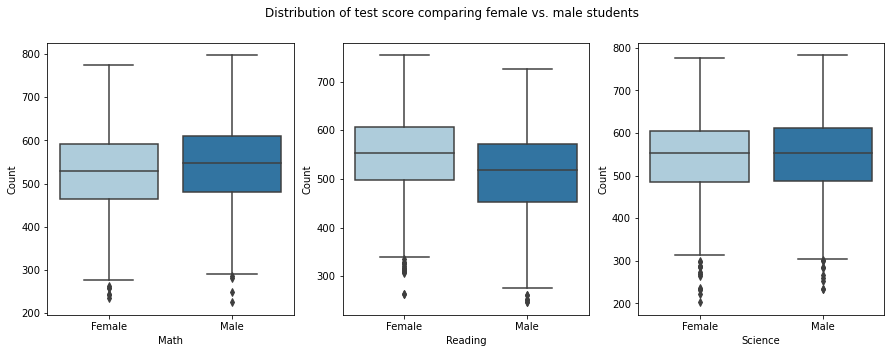

In [235]:
fix, axes = plt.subplots(1,3,figsize=(15,5))
sb.boxplot(x="gender", y="math_score", data=df_ger, ax=axes[0])
sb.boxplot(x="gender", y="reading_score", data=df_ger, ax=axes[1])
sb.boxplot(x="gender", y="science_score", data=df_ger, ax=axes[2])

"""Set xlabels to destinguish plot target (math, reading, science)"""
axes[0].set_xlabel("Math")
axes[1].set_xlabel("Reading")
axes[2].set_xlabel("Science")
axes[0].set_ylabel("Count")
axes[1].set_ylabel("Count")
axes[2].set_ylabel("Count")

"""Set plot title"""
plt.suptitle('Distribution of test score comparing female vs. male students')

On the mathematics test, male students performed slightly better on average, by 20 points. On the contrary, females scored better on the reading test, also by 20 points. When it comes to science, female and male students in Germany performed equally well on the PISA 2012 test.

### Do school joices depend on parents' education?

<AxesSubplot:xlabel='education_parents', ylabel='school_type'>

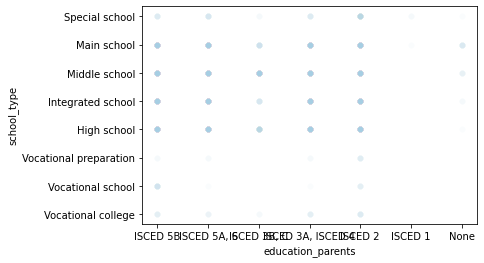

In [236]:
sb.scatterplot(data=df_ger, x="education_parents", y="school_type", alpha=0.05)

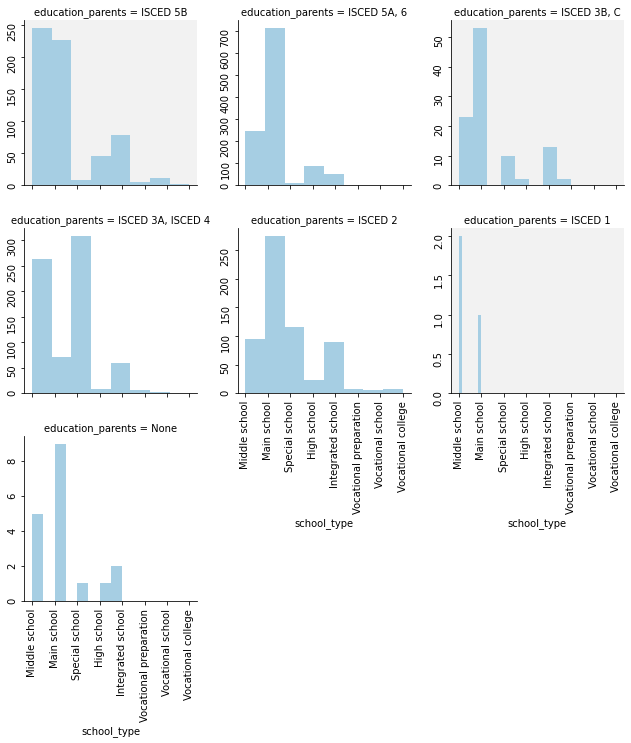

In [237]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df_ger, col = 'education_parents', col_wrap=3, sharey = False)
g.map(plt.hist, "school_type", bins=8)
g.set(xticks = df_ger.school_type.value_counts().sort_index().index)

for row_val, ax in g.axes_dict.items():
    if row_val == "ISCED 3B, C" or row_val == "ISCED 1" or row_val == "ISCED 5B":
        ax.set_facecolor(".95")
    else:
        ax.set_facecolor((0, 0, 0, 0))
    ax.tick_params(labelrotation=90)
        

From the plots we cannot derive that there is a correlation between school type and parental education. This is surprising as I expected parents with higher education to influence their kid's school choices.

### Do students raised by single parents underperform?

In [238]:
df_ger[["family_structure", "math_score", "reading_score", "science_score"]].groupby("family_structure").describe()

math_score                                               \
                          count        mean        std       min         25%   
family_structure                                                               
Both parents             2814.0  534.857936  93.436258  224.8871  472.550250   
Single father/mother      371.0  533.856719  84.990037  243.1921  471.031300   
Other                      12.0  382.089633  86.318433  235.4806  329.362075   

                                                     reading_score  \
                           50%         75%       max         count   
family_structure                                                     
Both parents          539.5778  601.133375  797.0167        2814.0   
Single father/mother  544.0178  596.635000  769.9875         371.0   
Other                 377.3641  444.508450  519.7928          12.0   

                                  ...                      science_score  \
                            mean  ...        75%       max         count   
family_structure                  ...                                      
Both parents          528.754653  ...  590.31535  753.8837        2814.0   
Single father/mother  532.332275  ...  593.38105  696.6934         371.0   
Other                 403.806092  ...  445.53575  600.6613          12.0   

                                                                             \
                            mean        std       min         25%       50%   
family_structure                                                              
Both parents          545.000944  90.232288  202.1074  486.329700  552.5830   
Single father/mother  546.656916  80.793261  268.1276  489.453550  555.5203   
Other                 388.690483  98.539649  269.8993  331.187025  383.0101   

                                            
                             75%       max  
family_structure                            
Both parents          608.672100  782.1149  
Single father/mother  601.538600  744.8154  
Other                 445.976325  619.2093  

[3 rows x 24 columns]

Text(0.5, 0.98, 'Distribution of test score comparing student family structures')

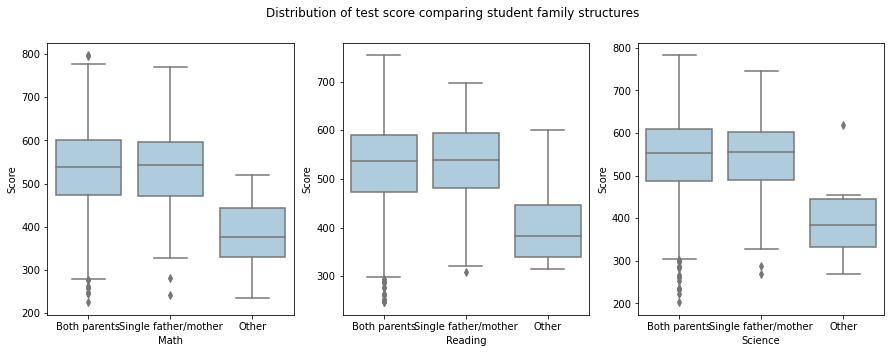

In [239]:
fix, axes = plt.subplots(1,3,figsize=(15,5))
sb.boxplot(x="family_structure", y="math_score", data=df_ger, ax=axes[0], color=color)
sb.boxplot(x="family_structure", y="reading_score", data=df_ger, ax=axes[1], color=color)
sb.boxplot(x="family_structure", y="science_score", data=df_ger, ax=axes[2], color=color)

"""Set xlabels to destinguish plot target (math, reading, science)"""
axes[0].set_xlabel("Math")
axes[1].set_xlabel("Reading")
axes[2].set_xlabel("Science")
axes[0].set_ylabel("Score")
axes[1].set_ylabel("Score")
axes[2].set_ylabel("Score")

"""Set plot title"""
plt.suptitle('Distribution of test score comparing student family structures')

Above boxplots suggest that the availability of both parents does not have an influence on students school performances. Students raised by a single parent (father or mother) perform equally well in all three test subjects. This is counter-intuitive, since I expected kids' performances to depend on support given by their parents and single parents tend to have less time for their kids as they have to juggle several responsibilities on their own.

Nevetheless, students living in `other` familily structures (no parents, living with grandparents etc.) tend to perform significally lower compared to the othe two categories. Finding reasons for this could be open for further research.

### Is the type of school important?

In [240]:
df_ger[["school_type", "math_score", "reading_score", "science_score"]].groupby("school_type").describe()

math_score                                   \
                            count        mean        std       min   
school_type                                                          
Special school               54.0  360.292365  63.687774  224.8871   
Main school                 271.0  433.225248  75.385871  235.4806   
Middle school              1067.0  508.836138  70.571781  293.9788   
Integrated school           342.0  474.864505  77.850099  245.5289   
High school                1404.0  595.855442  67.379250  369.4579   
Vocational preparation       13.0  433.516485  72.992623  326.6163   
Vocational school            20.0  536.193335  77.105212  347.8034   
Vocational college           26.0  484.764565  63.556553  339.7803   

                                                                     \
                               25%        50%         75%       max   
school_type                                                           
Special school          316.606925  360.42220  391.190200  506.8624   
Main school             382.193500  428.65710  485.285850  677.2940   
Middle school           459.736700  507.32980  557.804950  703.5442   
Integrated school       421.763525  471.10920  529.178975  687.9654   
High school             550.405000  596.12870  642.787000  797.0167   
Vocational preparation  362.369500  431.85080  499.618300  533.9695   
Vocational school       513.717075  538.40940  593.636075  657.6647   
Vocational college      430.955000  488.20685  535.118375  586.7814   

                       reading_score              ...                        \
                               count        mean  ...         75%       max   
school_type                                       ...                         
Special school                  54.0  359.347863  ...  397.317875  475.9546   
Main school                    271.0  428.888704  ...  471.717950  627.0226   
Middle school                 1067.0  508.182284  ...  552.325400  702.2535   
Integrated school              342.0  477.137215  ...  522.228450  661.7437   
High school                   1404.0  585.381625  ...  623.636650  753.8837   
Vocational preparation          13.0  402.823431  ...  454.123200  489.1682   
Vocational school               20.0  500.909235  ...  543.755975  682.4752   
Vocational college              26.0  464.646196  ...  502.822125  553.7970   

                       science_score                                   \
                               count        mean        std       min   
school_type                                                             
Special school                  54.0  364.843828  73.758739  202.1074   
Main school                    271.0  446.598861  77.465560  236.4230   
Middle school                 1067.0  523.487839  71.370293  299.0862   
Integrated school              342.0  494.785647  76.167675  263.4651   
High school                   1404.0  601.153987  63.849044  363.3346   
Vocational preparation          13.0  442.560177  72.790015  298.8064   
Vocational school               20.0  524.100155  70.553155  397.9299   
Vocational college              26.0  474.734600  60.397215  355.7814   

                                                                     
                               25%        50%         75%       max  
school_type                                                          
Special school          324.496475  375.08395  419.377100  525.6807  
Main school             392.754550  448.09770  500.410300  677.6762  
Middle school           474.860150  524.46850  573.610600  725.0466  
Integrated school       446.652375  494.90860  542.348900  696.6990  
High school             559.320200  600.93250  642.101850  782.1149  
Vocational preparation  393.453900  448.65720  493.230100  572.3051  
Vocational school       459.753850  531.83515  575.801950  649.7016  
Vocational college      425.065300  488.33460  516.565625  569.7874  

[8 rows x 24 columns]

Text(0.5, 0.9, 'Distribution of test score comparing school types')

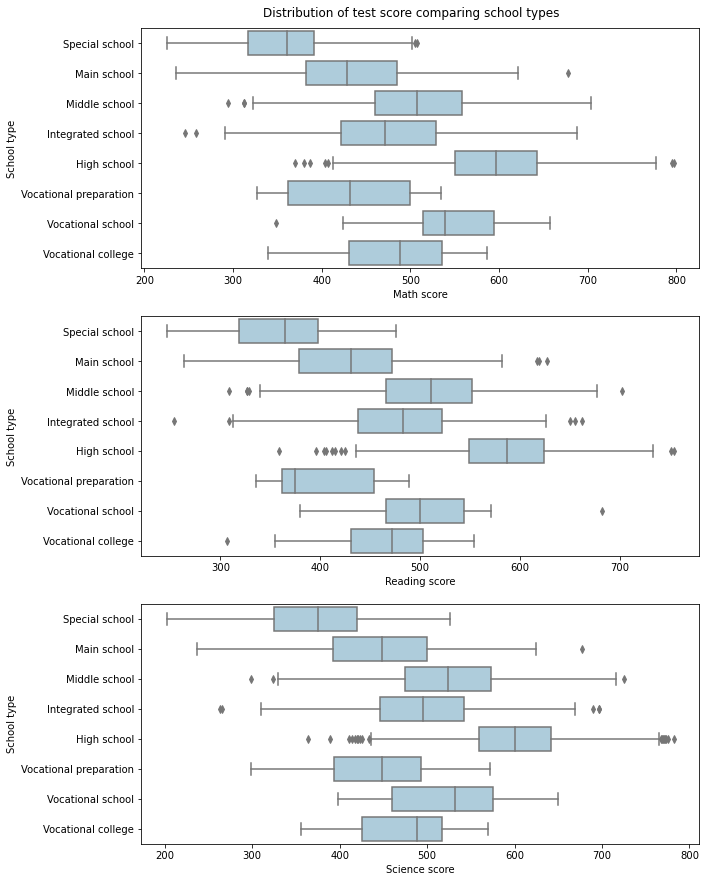

In [241]:
fix, axes = plt.subplots(3,1,figsize=(10,15))
sb.boxplot(y="school_type", x="math_score", data=df_ger, ax=axes[0], color=color)
sb.boxplot(y="school_type", x="reading_score", data=df_ger, ax=axes[1], color=color)
sb.boxplot(y="school_type", x="science_score", data=df_ger, ax=axes[2], color=color)

"""Set xlabels to destinguish plot target (math, reading, science)"""
axes[0].set_xlabel("Math score")
axes[1].set_xlabel("Reading score")
axes[2].set_xlabel("Science score")
axes[0].set_ylabel("School type")
axes[1].set_ylabel("School type")
axes[2].set_ylabel("School type")


"""Set plot title"""
plt.suptitle('Distribution of test score comparing school types', y=0.9)

### Does the education of parents affect test scores of their children?

In [242]:
df_ger[["education_parents", "math_score", "reading_score", "science_score"]].groupby("education_parents").describe()

math_score                                               \
                       count        mean        std       min         25%   
education_parents                                                           
ISCED 5B               623.0  527.491906  90.128330  224.8871  464.955600   
ISCED 5A, 6           1112.0  564.426344  90.840685  257.7582  514.340200   
ISCED 3B, C            103.0  512.666656  84.065935  331.2899  453.738900   
ISCED 3A, ISCED 4      719.0  533.103100  86.438832  235.4806  476.406000   
ISCED 2                619.0  495.266968  88.762394  276.2969  434.810700   
ISCED 1                  3.0  325.863333  53.170724  277.8548  297.289300   
None                    18.0  434.053422  63.931825  310.9597  391.813375   

                                                  reading_score              \
                         50%        75%       max         count        mean   
education_parents                                                             
ISCED 5B           531.71050  591.29930  797.0167         623.0  528.723153   
ISCED 5A, 6        573.53950  625.02730  776.8422        1112.0  551.619374   
ISCED 3B, C        508.18660  576.11000  695.2095         103.0  508.648985   
ISCED 3A, ISCED 4  535.37160  593.83085  767.5728         719.0  531.425269   
ISCED 2            493.23100  560.68700  795.2251         619.0  491.515363   
ISCED 1            316.72380  349.86760  383.0114           3.0  332.919300   
None               430.95495  481.52750  527.5822          18.0  429.382744   

                   ...                      science_score              \
                   ...        75%       max         count        mean   
education_parents  ...                                                  
ISCED 5B           ...  583.09495  725.6619         623.0  542.956738   
ISCED 5A, 6        ...  609.95470  753.8837        1112.0  573.152230   
ISCED 3B, C        ...  569.92125  677.5505         103.0  522.397096   
ISCED 3A, ISCED 4  ...  586.68140  700.1883         719.0  543.280095   
ISCED 2            ...  546.30090  721.2375         619.0  505.121995   
ISCED 1            ...  344.40705  346.4820           3.0  307.509633   
None               ...  482.88140  549.7460          18.0  415.610883   

                                                                         \
                         std       min         25%       50%        75%   
education_parents                                                         
ISCED 5B           84.496243  310.2760  487.914950  547.9672  601.39870   
ISCED 5A, 6        87.523757  258.9892  524.678275  583.5416  631.05180   
ISCED 3B, C        86.804926  306.5461  459.380800  517.2883  598.22830   
ISCED 3A, ISCED 4  81.367110  202.1074  491.365150  548.9929  597.48230   
ISCED 2            87.493684  221.6897  448.610600  505.3525  565.73105   
ISCED 1            72.272934  234.7445  271.624400  308.5043  343.89220   
None               80.675108  284.8191  350.909200  426.0444  479.47590   

                             
                        max  
education_parents            
ISCED 5B           771.5778  
ISCED 5A, 6        773.1630  
ISCED 3B, C        702.5737  
ISCED 3A, ISCED 4  775.5875  
ISCED 2            782.1149  
ISCED 1            379.2801  
None               553.8419  

[7 rows x 24 columns]

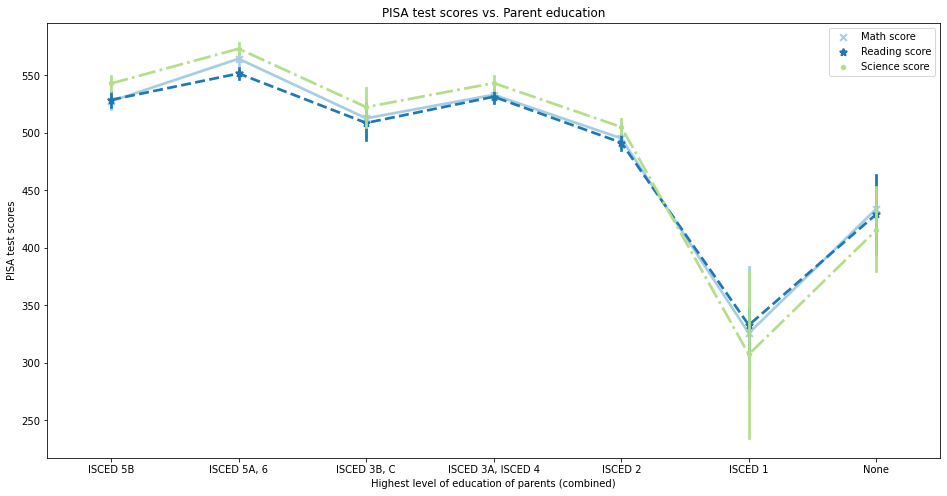

In [243]:
plt.figure(figsize=(16,8))

df_scores = df_ger.melt('education_parents', value_vars=['math_score','reading_score','science_score'], 
               var_name="score_type", value_name='score_value')
point = sb.pointplot(y="score_value", x="education_parents", order=education_categories.categories, data=df_scores, markers=["x","*","."], linestyles=["-", "--", "-."],  hue="score_type")
plt.title("PISA test scores vs. Parent education")
plt.xlabel("Highest level of education of parents (combined)")
plt.ylabel("PISA test scores")
new_labels = ["Math score", "Reading score", "Science score"]
for t, l in zip(point.legend().texts, new_labels): t.set_text(l)

The plot shows indication that education of parents has influence on the test scores of the student. It gives rise to the assumption that higher educated parents pass on their knowledge onto their kids. Also it seems that no education is better than special school education. Reasons for this can be manifold and would need additional data. 

### Is school harder for immigrants?

In [244]:
df_ger[["immigration_status", "math_score", "reading_score", "science_score"]].groupby("immigration_status").describe()

math_score                                                \
                        count        mean         std       min         25%   
immigration_status                                                            
Native                 2902.0  539.323494   91.342680  224.8871  477.399125   
Second-Generation       249.0  486.669186   91.693445  248.8004  415.648900   
First-Generation         46.0  466.059661  100.008020  235.4806  404.607450   

                                                   reading_score              \
                          50%        75%       max         count        mean   
immigration_status                                                             
Native              544.71880  604.69700  797.0167        2902.0  532.706911   
Second-Generation   484.89640  557.18180  740.3879         249.0  494.983058   
First-Generation    462.57985  539.57785  704.5568          46.0  458.484857   

                    ...                       science_score              \
                    ...         75%       max         count        mean   
immigration_status  ...                                                   
Native              ...  593.350425  753.8837        2902.0  550.570495   
Second-Generation   ...  548.236800  677.7093         249.0  488.902496   
First-Generation    ...  528.664025  666.0330          46.0  469.877393   

                                                                           \
                           std       min         25%       50%        75%   
immigration_status                                                          
Native               87.097113  202.1074  494.652200  557.6651  611.46960   
Second-Generation    92.547848  221.6897  429.448000  490.9922  555.52030   
First-Generation    100.574851  258.9892  396.717625  474.2074  544.42375   

                              
                         max  
immigration_status            
Native              782.1149  
Second-Generation   722.5289  
First-Generation    715.9082  

[3 rows x 24 columns]

Text(0.5, 0.91, 'Distribution of test score comparing student family structures')

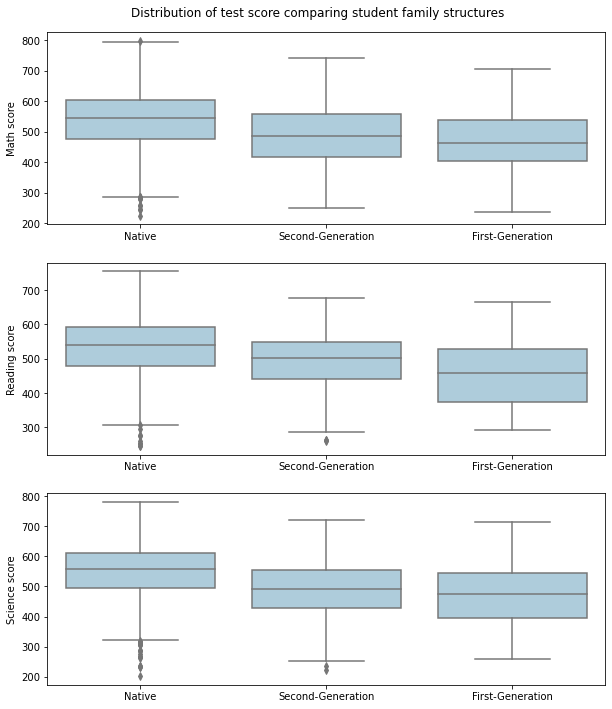

In [245]:
fix, axes = plt.subplots(3,1,figsize=(10,12))
sb.boxplot(x="immigration_status", y="math_score", data=df_ger, ax=axes[0], color=color)
sb.boxplot(x="immigration_status", y="reading_score", data=df_ger, ax=axes[1], color=color)
sb.boxplot(x="immigration_status", y="science_score", data=df_ger, ax=axes[2], color=color)

"""Set y to destinguish plot target (math, reading, science)"""
axes[0].set_ylabel("Math score")
axes[1].set_ylabel("Reading score")
axes[2].set_ylabel("Science score")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")

"""Set plot title"""
plt.suptitle('Distribution of test score comparing student family structures',y=0.91)

Native students scored on average 550 on all three tests. First and second-generation immigrations performed lower (by about 10%). From the boxplots above, I derive that immigrants in general struggle more in school and perform less compared to native students. Second-generation immigrants perform better than first-generation immigrants, giving rise to the assumption that this effect is weakened with the timing spend in the migrated country.

### Is there a correlation between immigration status and family structure?

In [246]:
family_structure_by_immigration_status = (df_ger[["immigration_status","family_structure","math_score"]].groupby(['immigration_status','family_structure']).count()/df_ger[["immigration_status","math_score"]].groupby('immigration_status').count())
family_structure_by_immigration_status

math_score
immigration_status family_structure                
Native             Both parents            0.876292
                   Single father/mother    0.120606
                   Other                   0.003101
Second-Generation  Both parents            0.915663
                   Single father/mother    0.080321
                   Other                   0.004016
First-Generation   Both parents            0.934783
                   Single father/mother    0.021739
                   Other                   0.043478

<AxesSubplot:xlabel='family_structure', ylabel='count'>

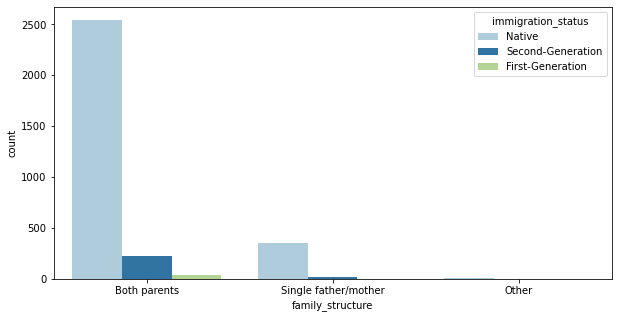

In [247]:
plt.figure(figsize=(10,5))
sb.countplot(data=df_ger, x="family_structure", hue="immigration_status")

The number of students living with both parents is slighly higher for immigrants (93%), compared to native students (88%).

### Do highly educated people migrate to Germany?

In [248]:
immigration_education = df_ger.query("immigration_status != 'Native'").education_parents.value_counts()
immigration_education_perc = df_ger.query("immigration_status != 'Native'").education_parents.value_counts(normalize=True)
immigration_education_perc

ISCED 5A, 6          0.261017
ISCED 2              0.244068
ISCED 3A, ISCED 4    0.216949
ISCED 5B             0.152542
ISCED 3B, C          0.081356
None                 0.044068
ISCED 1              0.000000
Name: education_parents, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ISCED 5B'),
  Text(1, 0, 'ISCED 5A, 6'),
  Text(2, 0, 'ISCED 3B, C'),
  Text(3, 0, 'ISCED 3A, ISCED 4'),
  Text(4, 0, 'ISCED 2'),
  Text(5, 0, 'ISCED 1'),
  Text(6, 0, 'None')])

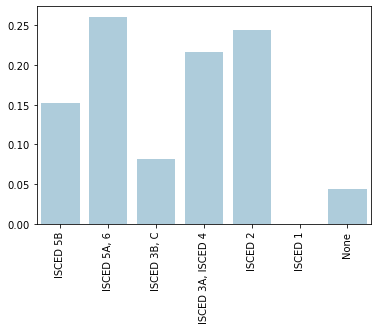

In [249]:
sb.barplot(x=immigration_education_perc.index, y=immigration_education_perc.values, order=education_categories.categories, color=color)
plt.xticks(rotation=90)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Attended school is a gread indicator for attained scores for each student. This is possibly due to the different level of educaiton in general and therefore expected.
> - Students raised by a single parent (father or mother) perform equally well in all three test subjects. This is great to see but also counter-intuitive, since I expected kids' performances to depend on support given by their parents and single parents tend to have less time for their kids as they have to juggle several responsibilities on their own.
> - Education of parents has influence on the test scores of the student. It gives rise to the assumption that higher educated parents pass on their knowledge onto their kids. 
> - Immigrants in general struggle more in school and perform less compared to native students. Second-generation immigrants perform better than first-generation immigrants, giving rise to the assumption that this effect is weakened with the timing spend in the migrated country.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Surprisingly, a correlation between parental education and attended school could not be found.
> - Around 40% of immigrants have some form of tertiary education. Almost all of them (95%) have at least some form of secondary education. They build a great partion of the German educated work force.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Is there a correlation between how students perform on different subjects?

In [250]:
# Function to calculate correlation coefficient between two arrays (credit to this Stack Overflow answer 
# (https://stackoverflow.com/questions/30942577/seaborn-correlation-coefficient-on-pairgrid))
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.1, 0.95), size = 15, xycoords = ax.transAxes)

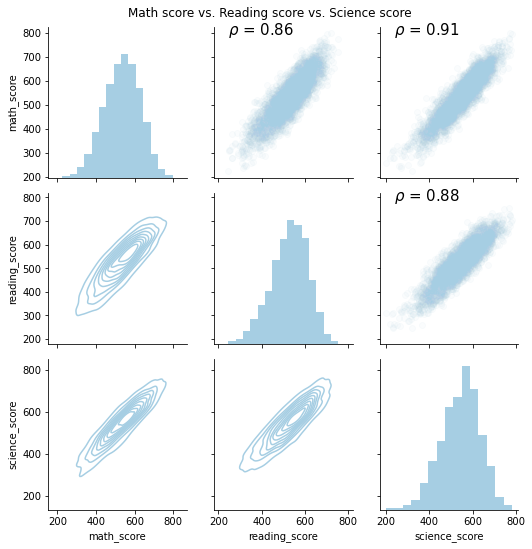

In [251]:
g = sb.PairGrid(df_ger[["math_score","reading_score","science_score"]])
plt.suptitle("Math score vs. Reading score vs. Science score", y=1.01)
g = g.map_upper(plt.scatter, color = color, alpha=0.05)
g = g.map_upper(corr)
g = g.map_diag(plt.hist, bins = 15, color = color)
g = g.map_lower(sb.kdeplot, color = color)


From the plots we can derive that students performing well on one subject tend to receive good results in tests regarding the other subjects as well. To support this, I will have a look at the Pearson correlation values.

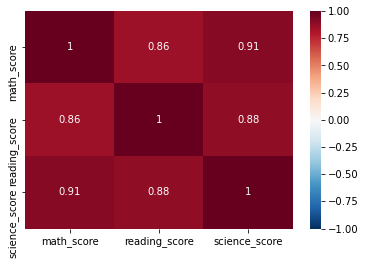

In [252]:
sb.heatmap(data=df_ger[["math_score","reading_score","science_score"]].corr(), center=0, cmap="RdBu_r",annot=True, vmin=-1, vmax=1);

Correlation values between all three test subjects are greater than 0.86, suggesting strong positive correlation.

### Correlation between Score, family structure, immigratition status

Text(0.5, 1.0, 'Distribution of PISA math test scores vs. Family status vs. Immigration status')

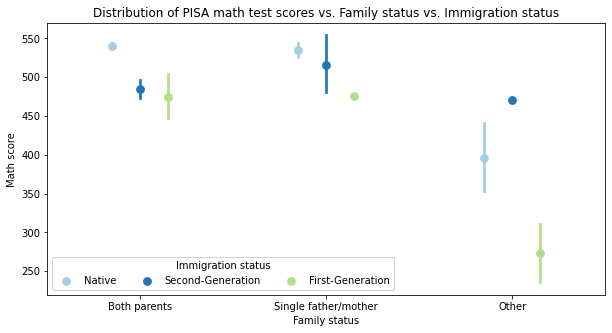

In [271]:

plt.figure(figsize=(10,5))


ax = sb.pointplot(data = df_ger, x = 'family_structure', y = 'math_score', hue = 'immigration_status',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 0, ncol = 3, framealpha = .9, title = 'Immigration status')
ax.set_xlabel("Family status")
ax.set_ylabel("Math score")
plt.title("Distribution of PISA math test scores vs. Family status vs. Immigration status")

Text(0, 0.5, 'Reading score')

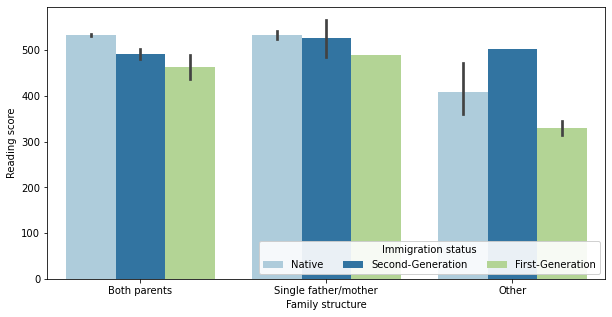

In [254]:

plt.figure(figsize=(10,5))
ax = sb.barplot(data = df_ger, x = 'family_structure', y = 'reading_score', hue = 'immigration_status')
ax.legend(loc = 4, ncol = 3, framealpha = .9, title = 'Immigration status')
ax.set_xlabel("Family structure")
ax.set_ylabel("Reading score")

Text(0, 0.5, 'Science score')

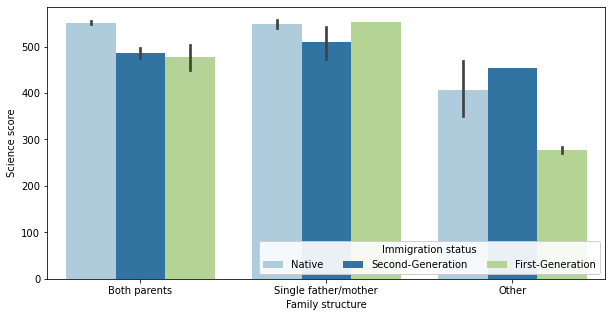

In [255]:

plt.figure(figsize=(10,5))
ax = sb.barplot(data = df_ger, x = 'family_structure', y = 'science_score', hue = 'immigration_status')
ax.legend(loc = 4, ncol = 3, framealpha = .9, title = 'Immigration status')
ax.set_xlabel("Family structure")
ax.set_ylabel("Science score")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Students performing well in one test on average also perform well in the other two subjects.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!